## Comparison of Models
--- 
In this section, we will be comparing and analysing the performance of the 3 ML models we have utilized.

In [1]:
# importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt # data visualization
import ipywidgets as widgets # interactive widgets
from ipywidgets import Box

In [2]:
import pickle
# Load the saved model from file
with open('random_forest_model.pkl', 'rb') as file:
    rforest = pickle.load(file)


# load the saved model
with open('linear_regression_model.pkl', 'rb') as file:
    model_regression = pickle.load(file)

# Load the saved model from file
with open('model_decision_model.pkl', 'rb') as file:
    model_decision_tree = pickle.load(file)

In [3]:
# Load the dataset into a pandas dataframe
RefinedMusicData = pd.read_csv('../Data/tracks_cleaned.csv')
RefinedMusicData.drop('release_date',axis=1,inplace=True)
RefinedMusicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        469281 non-null  int64  
 1   duration_ms       469281 non-null  int64  
 2   explicit          469281 non-null  int64  
 3   danceability      469281 non-null  float64
 4   energy            469281 non-null  float64
 5   key               469281 non-null  int64  
 6   loudness          469281 non-null  float64
 7   mode              469281 non-null  int64  
 8   speechiness       469281 non-null  float64
 9   acousticness      469281 non-null  float64
 10  instrumentalness  469281 non-null  float64
 11  liveness          469281 non-null  float64
 12  valence           469281 non-null  float64
 13  tempo             469281 non-null  float64
 14  time_signature    469281 non-null  int64  
 15  num_artists       469281 non-null  int64  
 16  year              46

In [4]:
# Data cleaning and arrangement
time_signature_df=pd.get_dummies(RefinedMusicData["time_signature"])
time_signature_df.columns = time_signature_df.columns.astype(str)
RefinedMusicData = pd.concat([RefinedMusicData,time_signature_df],axis=1)
RefinedMusicData['mode'] = np.where(RefinedMusicData['mode']=='Major', 1, 0)

In [5]:
# data modelling
X= RefinedMusicData.loc[:,RefinedMusicData.columns !="popularity"] # all the features accept popularity
y = RefinedMusicData["popularity"] # the popularity
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       469281 non-null  int64  
 1   explicit          469281 non-null  int64  
 2   danceability      469281 non-null  float64
 3   energy            469281 non-null  float64
 4   key               469281 non-null  int64  
 5   loudness          469281 non-null  float64
 6   mode              469281 non-null  int64  
 7   speechiness       469281 non-null  float64
 8   acousticness      469281 non-null  float64
 9   instrumentalness  469281 non-null  float64
 10  liveness          469281 non-null  float64
 11  valence           469281 non-null  float64
 12  tempo             469281 non-null  float64
 13  time_signature    469281 non-null  int64  
 14  num_artists       469281 non-null  int64  
 15  year              469281 non-null  int64  
 16  0                 46

In [6]:
# separate the data to training and testing
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

# save as np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)

In [7]:
# estimate the R² score on training and testing data
# (1) Linear regression
print("Linear Regression Train Set R^2: " + str(model_regression.score(X_train,y_train)))
print("Linear Regression Test Set R^2: " + str(model_regression.score(X_test,y_test)))

# (2) Random Forest
print("Random Forest Train Set R^2: " + str(rforest.score(X_train,y_train)))
print("Random Forest Test Set R^2: " + str(rforest.score(X_test,y_test)))
# (3) Decision Tree
print("Decision Tree Train Set R^2: " + str(model_decision_tree.score(X_train,y_train)))
print("Decision Tree Test Set R^2: " + str(model_decision_tree.score(X_test,y_test)))



Linear Regression Train Set R^2: 0.37657130852033915
Linear Regression Test Set R^2: 0.3762227480743149


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    8.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s


Random Forest Train Set R^2: 0.5814647510896286


[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    2.1s finished


Random Forest Test Set R^2: 0.5795611684985552
Decision Tree Train Set R^2: 0.8021655764613704
Decision Tree Test Set R^2: 0.8012666360521505


In [8]:
from sklearn.metrics import mean_squared_error

# calculate the predictions on training and testing data
y_train_pred = model_regression.predict(X_train)
y_test_pred = model_regression.predict(X_test)

# calculate the RMSE and MSE on training and testing data for linear regression
print("Linear Regression Train Set RMSE: " + str(mean_squared_error(y_train, y_train_pred, squared=False)))
print("Linear Regression Train Set MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("Linear Regression Test Set RMSE: " + str(mean_squared_error(y_test, y_test_pred, squared=False)))
print("Linear Regression Test Set MSE: " + str(mean_squared_error(y_test, y_test_pred)))

# calculate the predictions on training and testing data
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# calculate the RMSE and MSE on training and testing data for random forest
print("Random Forest Train Set RMSE: " + str(mean_squared_error(y_train, y_train_pred, squared=False)))
print("Random Forest Train Set MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("Random Forest Test Set RMSE: " + str(mean_squared_error(y_test, y_test_pred, squared=False)))
print("Random Forest Test Set MSE: " + str(mean_squared_error(y_test, y_test_pred)))

# calculate the predictions on training and testing data
y_train_pred = model_decision_tree.predict(X_train)
y_test_pred = model_decision_tree.predict(X_test)

# calculate the RMSE and MSE on training and testing data for decision tree
print("Decision Tree Train Set RMSE: " + str(mean_squared_error(y_train, y_train_pred, squared=False)))
print("Decision Tree Train Set MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("Decision Tree Test Set RMSE: " + str(mean_squared_error(y_test, y_test_pred, squared=False)))
print("Decision Tree Test Set MSE: " + str(mean_squared_error(y_test, y_test_pred)))


Linear Regression Train Set RMSE: 14.493720872309465
Linear Regression Train Set MSE: 210.06794472441905
Linear Regression Test Set RMSE: 14.536950397866327
Linear Regression Test Set MSE: 211.32292687002598


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    5.9s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    9.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    2.0s finished


Random Forest Train Set RMSE: 11.875516856130082
Random Forest Train Set MSE: 141.02790060022969
Random Forest Test Set RMSE: 11.934657286533662
Random Forest Test Set MSE: 142.43604454701102
Decision Tree Train Set RMSE: 8.164647350971519
Decision Tree Train Set MSE: 66.66146636572626
Decision Tree Test Set RMSE: 8.205289984525008
Decision Tree Test Set MSE: 67.32678373014639


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Paral

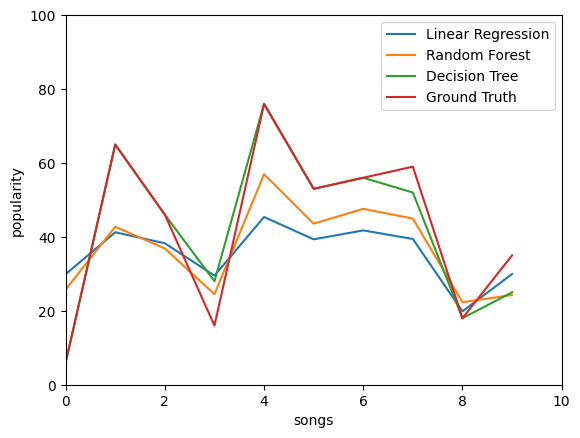

In [9]:
test_samples = 10 # amount of songs which would be evaluated
# initialized empty lists for the models predictions
regression = [] 
random_forest = [] 
decision_tree = []
ground_truth = []
# collecting the models' predictions 
for i in range(test_samples): 
    regression.append(model_regression.predict([X_test[i]])) 
    random_forest.append(rforest.predict([X_test[i]]))
    decision_tree.append(model_decision_tree.predict([X_test[i]]))
    ground_truth.append(y_test[i])
# Plotting the models' predictions in comparison to the ground truth
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.plot(range(len(ground_truth)), ground_truth, label='Ground Truth')
plt.xlim([0, test_samples])
plt.ylim([0, 100])
plt.xlabel('songs')
plt.ylabel('popularity')
plt.legend()
plt.show()

In [8]:
# Variables ranges
acousticness = [0,1]
danceability = [0,1]
duration_ms = [0,1000]
energy = [0,1]
instrumentalness = [0,1]
liveness = [0,1]
loudness= [ -60,0]
speechiness = [0,1]
tempo = [0,250]
valence = [0,1]
mode = [0,1]
features_range = {"acousticness":[0,1],"danceability" : [0,1],"duration_ms":[0,1000],"energy":[0,1],"instrumentalness":[0,1],"liveness":[0,1],"loudness": [-60,0],"speechiness" : [0,1],"tempo" : [0,250],"valence" : [0,1],"mode" : [0,1]}

In [9]:
X_box=pd.DataFrame( X.drop(['explicit','time_signature','0','1','3','4','5','num_artists','year','key'],axis=1))
X_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       469281 non-null  int64  
 1   danceability      469281 non-null  float64
 2   energy            469281 non-null  float64
 3   loudness          469281 non-null  float64
 4   mode              469281 non-null  int64  
 5   speechiness       469281 non-null  float64
 6   acousticness      469281 non-null  float64
 7   instrumentalness  469281 non-null  float64
 8   liveness          469281 non-null  float64
 9   valence           469281 non-null  float64
 10  tempo             469281 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 39.4 MB


In [ ]:
regression = []
random_forest = []
decision_tree = []
features = X_box.shape[1]
widgets_box = []
headers = X_box.columns
temp_sample =X_box.iloc[0]
for feature in range(features):
   temp_widget = widgets.FloatSlider(value=temp_sample[feature],
   min=features_range[headers[feature]][0],
   max=features_range[headers[feature]][1],
   step=0.1,
   description=headers[feature],
   disabled=False,
   continuous_update=False,
   orientation='vertical',
   readout=True,
   readout_format='.1f',
   )
   widgets_box.append(temp_widget)
# display the features panel
box = Box(children=widgets_box)

In [ ]:
# Predict the popularity score based on the selected features
for feature in range(features):
   temp_sample[feature] = widgets_box[feature].value
   regression.append(model_regression.predict([temp_sample]))
   random_forest.append(rforest.predict([temp_sample]))
   decision_tree.append(model_decision_tree.predict([temp_sample]))
# plot a simple line chart
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(decision_tree)), decision_tree, label='Decision Tree')
plt.xlim([0, len(regression)])
plt.ylim([0, 100])
plt.legend()
plt.show()